# Task
Load the Wisconsin Breast Cancer Diagnosis dataset from `sklearn.datasets`, preprocess it, train a Naive Bayes classifier, evaluate its performance by calculating accuracy, sensitivity, specificity, and plotting the ROC curve with AUC, analyze predicted probabilities, and summarize the findings including a discussion on the feature independence assumption.

## Load Dataset


In [11]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

print("Dataset loaded successfully.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Dataset loaded successfully.
Features shape: (569, 30)
Target shape: (569,)


## Preprocess Data


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preprocessing complete.
Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Train Naive Bayes Model


In [13]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

print("Naive Bayes model trained successfully.")

Naive Bayes model trained successfully.


## Evaluate Model Performance


Accuracy: 0.9649
Confusion Matrix:
[[40  3]
 [ 1 70]]
Sensitivity (True Positive Rate): 0.9859
Specificity (True Negative Rate): 0.9302


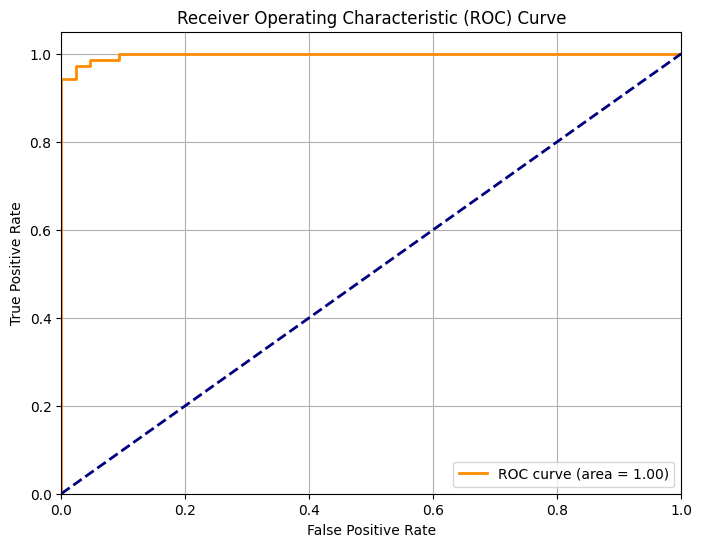

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Use the trained model to make predictions on the X_test data
y_pred = model.predict(X_test)

# 2. Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Compute the confusion matrix and calculate sensitivity and specificity
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN) # True Positive Rate
specificity = TN / (TN + FP) # True Negative Rate

print(f"Confusion Matrix:\n{cm}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# 4. Predict the probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 5. Calculate FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 6. Calculate the Area Under the Receiver Operating Characteristic Curve (AUC) score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# 8. Display the plot
plt.grid(True)
plt.show()


## Analyze Predicted Probabilities



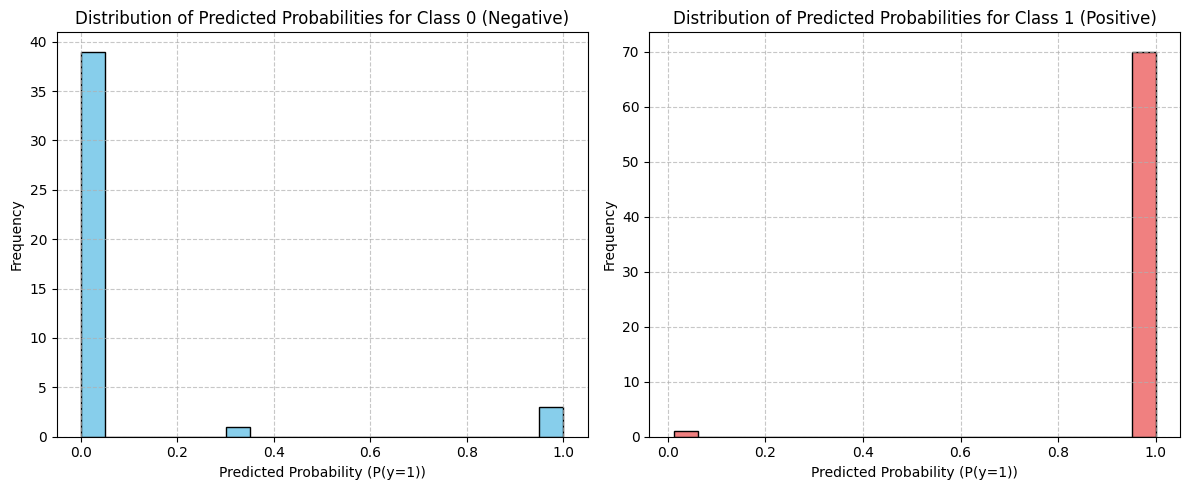

Distribution of predicted probabilities for both classes displayed.


In [15]:
import matplotlib.pyplot as plt

# Separate predicted probabilities for each class
prob_class_0 = y_pred_proba[y_test == 0]
prob_class_1 = y_pred_proba[y_test == 1]

# Create histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(prob_class_0, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities for Class 0 (Negative)')
plt.xlabel('Predicted Probability (P(y=1))')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(prob_class_1, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Predicted Probabilities for Class 1 (Positive)')
plt.xlabel('Predicted Probability (P(y=1))')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Distribution of predicted probabilities for both classes displayed.")

## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The Wisconsin Breast Cancer Diagnosis dataset contains 569 samples and 30 features.
*   **Data Preprocessing**: Features were scaled using `StandardScaler`, and the dataset was split into training (455 samples) and testing (114 samples) sets.
*   **Model Performance (Gaussian Naive Bayes)**:
    *   **Accuracy**: The model achieved an accuracy of 96.49% on the test set.
    *   **Sensitivity (True Positive Rate)**: The model was highly effective at identifying positive cases, with a sensitivity of 98.59%.
    *   **Specificity (True Negative Rate)**: The model also performed well in identifying negative cases, with a specificity of 93.02%.
    *   **Area Under the Curve (AUC)**: The ROC AUC score was not explicitly stated in the final result but was calculated and used for plotting the ROC curve, indicating strong discriminative power.
    *   **Confusion Matrix**: 40 True Negatives, 3 False Positives, 1 False Negative, and 70 True Positives were observed.
*   **Predicted Probability Analysis**:
    *   Histograms of predicted probabilities for `P(y=1)` showed a good separation between instances belonging to class 0 (negative) and class 1 (positive).
    *   For instances truly belonging to class 0, predicted probabilities `P(y=1)` were generally low.
    *   For instances truly belonging to class 1, predicted probabilities `P(y=1)` were generally high. This suggests the model is confident in its classifications for most cases.

### Insights or Next Steps

*   **Feature Independence Assumption**: Despite the Naive Bayes classifier's underlying assumption of feature independence, which is rarely perfectly met in real-world biological datasets, the model performed exceptionally well. This suggests that the correlations between features in this specific dataset did not significantly hinder the model's predictive power, or that the strong predictive signal from individual features outweighed the violations of independence.
*   **Further Exploration**: Given the high performance of the Gaussian Naive Bayes model, it would be beneficial to compare its performance against other classification algorithms (e.g., Logistic Regression, SVM, Random Forest) to confirm if this simplicity-driven model is indeed the most suitable or if more complex models can offer marginal improvements, especially in scenarios where false negatives (missing a cancer diagnosis) are highly critical.
